In [3]:
import torch
print(torch.__version__)

2.0.0+cu118


In [2]:
# GPU 연결

In [4]:
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [5]:
!git clone https://github.com/ultralytics/yolov5
%cd ./yolov5
#%pip install -qr requirements.txt

C:\Users\HSLab\Documents\kbChoi\yolov5


Cloning into 'yolov5'...


In [6]:
%cd ../

C:\Users\HSLab\Documents\kbChoi


In [7]:
!git clone https://github.com/Ottug-i/Curry_Data

Cloning into 'Curry_Data'...
Updating files:   2% (1197/44118)
Updating files:   3% (1324/44118)
Updating files:   4% (1765/44118)
Updating files:   5% (2206/44118)
Updating files:   6% (2648/44118)
Updating files:   6% (2659/44118)
Updating files:   7% (3089/44118)
Updating files:   8% (3530/44118)
Updating files:   9% (3971/44118)
Updating files:   9% (4127/44118)
Updating files:  10% (4412/44118)
Updating files:  11% (4853/44118)
Updating files:  12% (5295/44118)
Updating files:  12% (5673/44118)
Updating files:  13% (5736/44118)
Updating files:  14% (6177/44118)
Updating files:  15% (6618/44118)
Updating files:  16% (7059/44118)
Updating files:  16% (7178/44118)
Updating files:  17% (7501/44118)
Updating files:  18% (7942/44118)
Updating files:  19% (8383/44118)
Updating files:  19% (8438/44118)
Updating files:  20% (8824/44118)
Updating files:  21% (9265/44118)
Updating files:  22% (9706/44118)
Updating files:  22% (9752/44118)
Updating files:  23% (10148/44118)
Updating files:  2

In [8]:
%cd C:\Users\HSLab\Documents\kbChoi\yolov5

C:\Users\HSLab\Documents\kbChoi\yolov5


In [9]:
## Dataset Split

In [10]:
from glob import glob

data_img_list = glob('../Curry_Data/object_detection/dataset/images/*.jpg')
print(len(data_img_list))

21981


In [11]:
from sklearn.model_selection import train_test_split

train_img_list, test_img_list = train_test_split(data_img_list, test_size=0.2, random_state=777)
print(len(train_img_list), len(test_img_list))

17584 4397


In [12]:
test_img_list, valid_img_list = train_test_split(test_img_list, test_size=0.5, random_state=777)
print(len(test_img_list), len(valid_img_list))

2198 2199


In [13]:
## Edit Data.yaml

In [14]:
#yaml 파일에 이미지 경로 리스트 작성
import yaml

with open('../Curry_Data/object_detection/train.txt', 'w') as f:
    f.write('\n'.join(train_img_list) + '\n')

with open('../Curry_Data/object_detection/test.txt', 'w') as f:
    f.write('\n'.join(test_img_list) + '\n')

with open('../Curry_Data/object_detection/valid.txt', 'w') as f:
    f.write('\n'.join(valid_img_list) + '\n')

In [15]:
# 파일의 문장을 텍스트처럼 이용하기 위해 함수 생성
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

In [17]:
%%writetemplate ../Curry_Data/object_detection/data.yaml

train: ../Curry_Data/object_detection/train.txt
test: ../Curry_Data/object_detection/test.txt
val: ../Curry_Data/object_detection/valid.txt

nc: 111
names: ['참치캔', '라면', '카레', '소주', '맥주', '닭', '닭가슴살', '소고기', '돼지', '오리고기', '삼겹살', '사과', '바나나', '레몬', '오렌지', '크랜베리', '복숭아', '포도', '망고', '토마토', '딸기', '체리', '수박', '석류', '고추', '파프리카', '당근', '옥수수', '오이', '가지', '마늘', '상추', '양파', '감자', '무', '시금치', '고구마', '샐러리', '브로콜리', '애호박', '단호박', '대파', '김치', '연근', '파슬리', '콩나물', '아보카도', '새송이버섯', '느타리버섯', '배추', '팽이버섯', '표고버섯', '양송이버섯', '목이버섯', '청경채', '고사리', '굴', '연어', '문어', '가리비', '해삼', '새우', '홍합', '갈치', '다시마', '꼬막', '고등어', '게', '전복', '참치', '오징어', '맛살', '초고추장', '땅콩잼', '누텔라', '케찹', '식용유', '식초', '후추', '달걀', '삶은달걀', '스팸', '소시지', '버터', '치즈', '우유', '만두', '두부', '밥', '파스타면', '국수', '밤', '아몬드', '호두', '식빵', '바게트', '크로와상', '와플', '고추장', '빵', '마요네즈', '김', '멸치', '생강', '베이컨', '박력분', '양배추', '깻잎', '머스터드', '된장', '부추']

In [18]:
%cat ../Curry_Data/object_detection/data.yaml # train, valid 경로 정보 및 레이블 (클래스) 확인

UsageError: Line magic function `%cat` not found.


In [19]:
## Edit Model Structure 

In [20]:
%pwd

'C:\\Users\\HSLab\\Documents\\kbChoi\\yolov5'

In [21]:
import yaml

# 데이터에서 클래스 수 가져오기
with open('../Curry_Data/object_detection/data.yaml', 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

print(num_classes)


111


In [22]:
# 80개의 클래스
%cat ./models/yolov5s.yaml

UsageError: Line magic function `%cat` not found.


In [23]:
%%writetemplate ./models/custom_yolov5s.yaml

# Parameters
nc: {num_classes}  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, C3, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, C3, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, C3, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]


In [24]:
%pwd

'C:\\Users\\HSLab\\Documents\\kbChoi\\yolov5'

In [25]:
## Train
# yolov5/train.py 에서 --workers default=0으로 수정해 주어야 window에서 메모리 오류 없이 실행 가능

In [48]:
!python train.py --img 640 --batch 64 --epochs 100 --data ../Curry_Data/object_detection/data.yaml --cfg ./models/custom_yolov5s.yaml --weight yolov5s.pt --name ingredients_results --cache --device 0

^C


WARNING  'ultralytics.yolo.v8' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.models.yolo' instead.
WARNING  'ultralytics.yolo.utils' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.utils' instead.
Note this warning may be related to loading older models. You can update your model to current structure with:
    import torch
    ckpt = torch.load("model.pt")  # applies to both official and custom models
    torch.save(ckpt, "updated-model.pt")

train: weights=yolov5s.pt, cfg=./models/custom_yolov5s.yaml, data=../Curry_Data/object_detection/data.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=3, batch_size=64, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=0, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=ingredients_results, exist_ok=False, qua

In [26]:
!python val.py --weights runs/train/ingredients_results2/weights/best.pt --data ../Curry_Data/object_detection/data.yaml --img 640 --iou 0.65 --half

WARNING  'ultralytics.yolo.v8' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.models.yolo' instead.
WARNING  'ultralytics.yolo.utils' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.utils' instead.
Note this warning may be related to loading older models. You can update your model to current structure with:
    import torch
    ckpt = torch.load("model.pt")  # applies to both official and custom models
    torch.save(ckpt, "updated-model.pt")

val: data=../Curry_Data/object_detection/data.yaml, weights=['runs/train/ingredients_results2/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.65, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs\val, name=exp, exist_ok=False, half=True, dnn=False
YOLOv5  v7.0-196-gacdf73b Python-3.11.4 torch-2.0.0+cu118 CUDA:0 (NVIDIA GeFo

In [27]:
!python val.py --weights runs/train/ingredients_results2/weights/best.pt --data ../Curry_Data/object_detection/data.yaml --img 640 --task test

WARNING  'ultralytics.yolo.v8' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.models.yolo' instead.
WARNING  'ultralytics.yolo.utils' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.utils' instead.
Note this warning may be related to loading older models. You can update your model to current structure with:
    import torch
    ckpt = torch.load("model.pt")  # applies to both official and custom models
    torch.save(ckpt, "updated-model.pt")

val: data=../Curry_Data/object_detection/data.yaml, weights=['runs/train/ingredients_results2/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs\val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5  v7.0-196-gacdf73b Python-3.11.4 torch-2.0.0+cu118 CUDA:0 (NVIDIA GeF

In [29]:
!python detect.py --weights runs/train/ingredients_results2/weights/best.pt --img 640 --conf 0.4 --source ../Curry_Data/object_detection/test

WARNING  'ultralytics.yolo.v8' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.models.yolo' instead.
WARNING  'ultralytics.yolo.utils' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.utils' instead.
Note this warning may be related to loading older models. You can update your model to current structure with:
    import torch
    ckpt = torch.load("model.pt")  # applies to both official and custom models
    torch.save(ckpt, "updated-model.pt")

detect: weights=['runs/train/ingredients_results2/weights/best.pt'], source=../Curry_Data/object_detection/test, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half

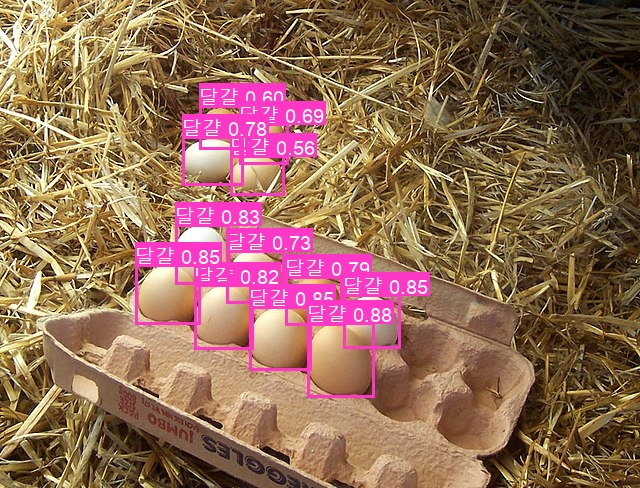

In [53]:
import glob
import random
from IPython.display import Image, display

image_name = random.choice(glob.glob('./runs/detect/exp2/*.jpg'))
display(Image(filename=image_name))

In [47]:
%pwd

'C:\\Users\\HSLab\\Documents\\kbChoi\\yolov5'

In [48]:
!python export.py --weights ./runs/train/ingredients_results2/weights/best.pt --include tflite

^C
